# 10 Insight Visualizations from Netflix Titles

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [11]:
data = pd.read_csv('netflix_titles.csv')

In [12]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
data.director.fillna("Unknown",inplace=True)
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   director      6643 non-null   object
 4   cast          6643 non-null   object
 5   country       6643 non-null   object
 6   date_added    6643 non-null   object
 7   release_year  6643 non-null   int64 
 8   rating        6643 non-null   object
 9   duration      6643 non-null   object
 10  listed_in     6643 non-null   object
 11  description   6643 non-null   object
dtypes: int64(1), object(11)
memory usage: 674.7+ KB


# Visualization 1 Distribution of Duration for Movies

In [15]:
#Mengubah tipe data kolom duration menjadi integer agar dapat diolah
duration=data.duration.apply(lambda x: x.split(" ")).apply(lambda x: x[0])
data['duration']=duration

data=data.astype({"duration":'int64'})

[[<matplotlib.axis.XTick at 0x2ccf2ecde20>,

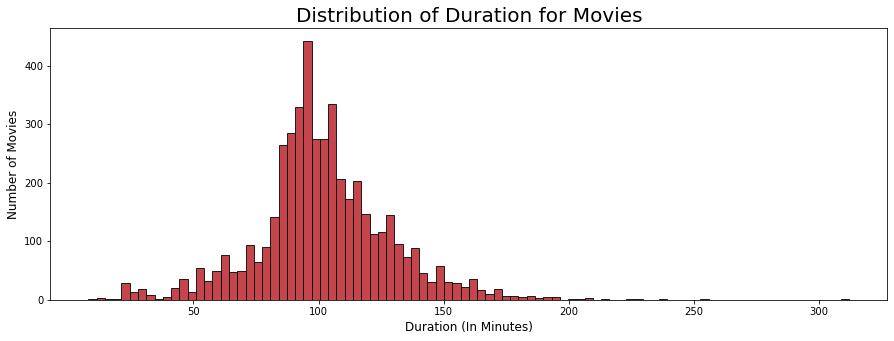

In [16]:
# Visualization 1 (Distribution of Duration for Movies)
fig, ax = plt.subplots(figsize=(15, 5))
viz1 = sns.histplot(data=data.loc[data.type=="Movie","duration"], color='#b20710')
viz1.set_title('Distribution of Duration for Movies', fontsize = 20)
viz1.set_xlabel('Duration (In Minutes)', fontsize = 12)
viz1.set_ylabel('Number of Movies', fontsize = 12)
viz1.set(xticks = [50, 100, 150, 200, 250, 300], yticks = [0, 100, 200, 300, 400])

Histogram diatas adalah visualisasi dari distribusi durasi film yang ada di platform Netflix. Sumbu x berisi tentang informasi durasi film (dalam menit) dan sumbu y berisi tentang jumlah film. Dapat dilihat pemusatan durasi film terlama terdapat pada 85 - 95 menit. Pada grafik tersebut juga ada data outlier yang mana memiliki durasi lebih dari 300 menit. Ada juga beberapa film pendek yang memiliki durasi kurang dari 50 menit.

# Visualization 2 Distribution Duration for TV Shows

[[<matplotlib.axis.XTick at 0x1e5030946a0>,

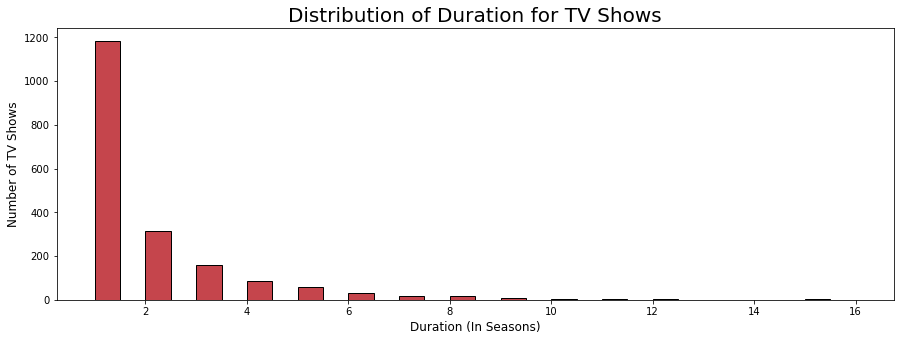

In [85]:
# Visualization 2 (Distribution of Duration for TV Shows)
fig, ax = plt.subplots(figsize=(15, 5))
viz2 = sns.histplot(data=data.loc[data.type=="TV Show","duration"],binwidth=.5,color='#b20710')
viz2.set_title('Distribution of Duration for TV Shows', fontsize = 20)
viz2.set_xlabel('Duration (In Seasons)', fontsize = 12)
viz2.set_ylabel('Number of TV Shows', fontsize = 12)
viz2.set(xticks = [2, 4, 6, 8, 10, 12, 14, 16], yticks = [0, 200, 400, 600, 800, 1000, 1200])

Histogram diatas adalah visualisasi dari distribusi durasi TV show yang ada di platform netflix. Sumbu x berisi tentang informasi durasi TV show (dalam season) dan sumbu y berisi tentang jumlah TV show. Dapat dilihat pemusatan durasi TV show terbanyak terdapat pada TV show yang hanya memiliki 1 season saja. Namun, ada juga TV show yang memiliki 15 season.

# Visualization 3 Movie Ratings Distribution

[[<matplotlib.axis.YTick at 0x1e504c2ed90>,

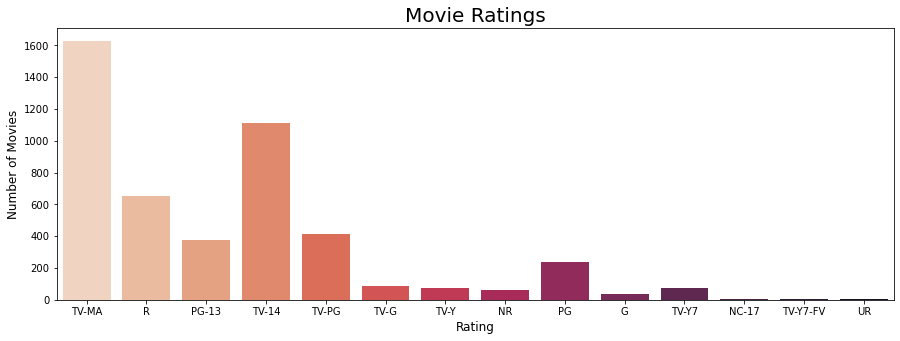

In [93]:
# Visualization 3 Movie Ratings Distribution
fig, ax = plt.subplots(figsize=(15, 5))
viz3 = sns.countplot(x=data_movie.rating,palette="rocket_r")
viz3.set_title("Movie Ratings", fontsize = 20)
viz3.set_xlabel("Rating", fontsize = 12)
viz3.set_ylabel("Number of Movies", fontsize = 12)
viz3.set(yticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])

Histogram diatas adalah visualisasi dari distribusi rating dari semua film yang ada di platform netflix. Sumbu x berisi tentang informasi kategori rating dan sumbu y berisi informasi tentang jumlah film. Dapat dilihat pemusatan terbesar terdapat pada rating TV-MA dan paling kecil pada rating NC-17, TV-Y7-FV, dan UR.

# Visualization 4 TV Shows Rating Distribution

[[<matplotlib.axis.YTick at 0x1e504e963a0>,

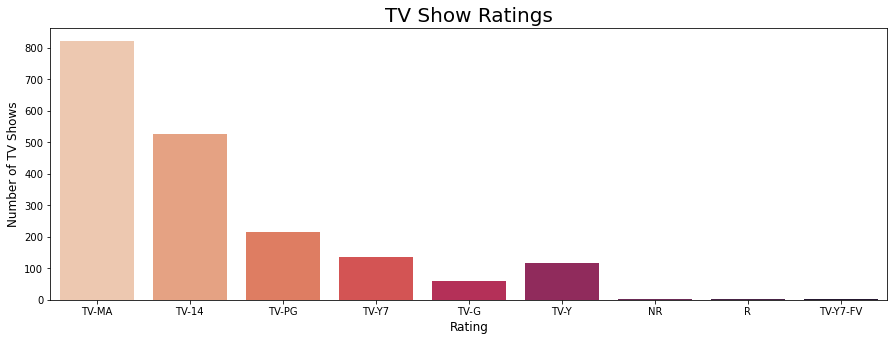

In [94]:
# Visualization 4 TV Shows Rating Distribution
fig, ax = plt.subplots(figsize=(15, 5))
viz4 = sns.countplot(x=data_tv.rating,palette="rocket_r")
viz4.set_title("TV Show Ratings", fontsize = 20)
viz4.set_xlabel("Rating", fontsize = 12)
viz4.set_ylabel("Number of TV Shows", fontsize = 12)
viz4.set(yticks = [0, 100, 200, 300, 400, 500, 600, 700, 800])

Histogram diatas adalah visualisasi dari distribusi rating dari semua tv show yang ada di platform netflix. Sumbu X berisi tentang informasi rating dan sumbu y berisi tentang informasi jumlah tv show. Dapat dilihat pemusatan terbesar ada pada rating TV-MA dan yang paling kecil ada di rating NR, R, dan TV-Y7-FV.

# Visualization 5 Top 10 Genres Percentage

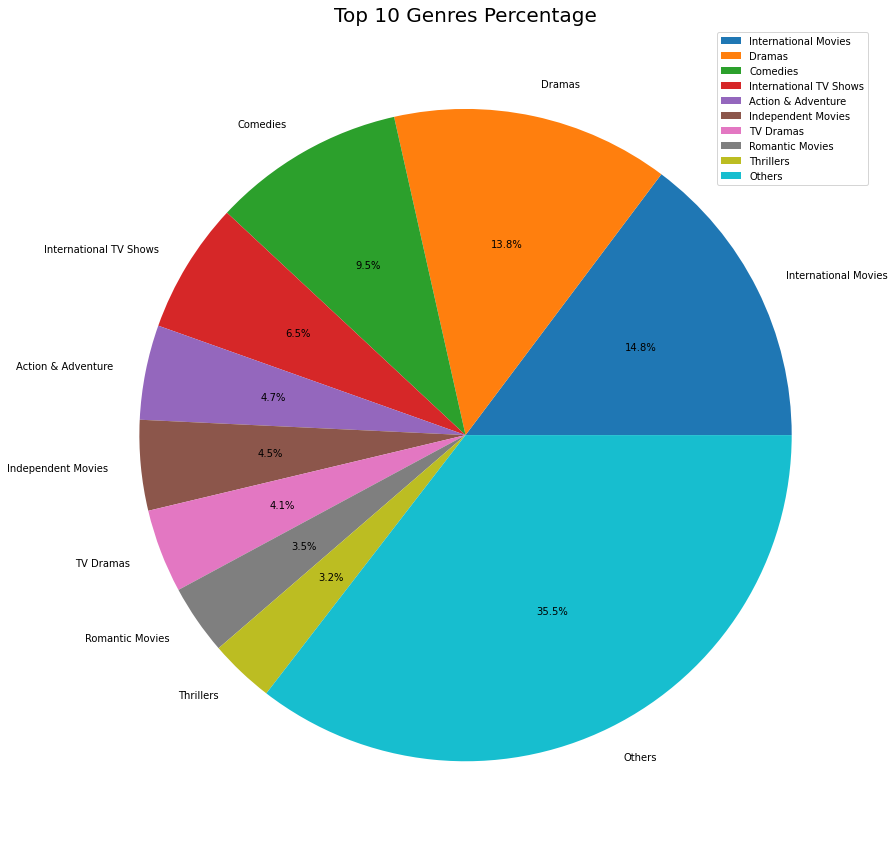

In [121]:
# Mendapatkan persentase 10 genre teratas
top9_genre = [(lambda x: x)(x.strip()) for x in ','.join(data['listed_in']).split(',')]
top9_list = list(Counter(top9_genre).most_common(9))
total_genre=len(top9_genre)
labels = [(lambda x:x)(x[0]) for x in top9_list]
labels.append('Others')
sizes = [(lambda x:x)(x[1]) for x in top9_list]
sizes.append(total_genre - sum(sizes))

# Visualization 5 Top 10 Genres Percentage
plt.figure(figsize=(15,15))
plt.title('Top 10 Genres Percentage', fontsize=20)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend(loc = 'upper right')
plt.show()

Pie chart diatas adalah visualisasi dari persentase 10 genre teratas semua film dan tv shows yang ada di platofrm netflix. Dalam pie chart tersebut dapat dilihat bahwa persentasi genre terbesar ada pada genre Others dan yang terkecil ada pada genre Thrillers.

# Visualization 6 Movie and TV Shows Release Trend (In Decade)

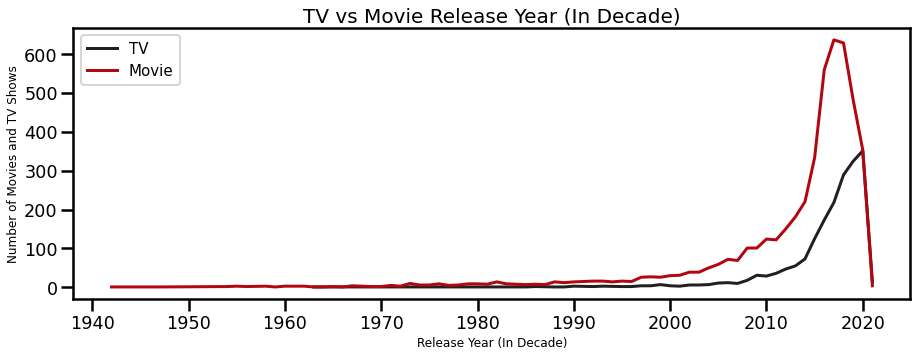

In [139]:
# Membuat dataframe terpisah antara Movies dan TV Shows
data_TV = data[data['type']=='TV Show'].groupby('release_year').count()
data_Movie = data[data['type']=='Movie'].groupby('release_year').count()

#Visualization 6 Movie and TV Shows Release Trend (In Decade)
plt.figure(figsize=(15,5))
sns.set_context("poster", font_scale = 0.8)
sns.lineplot(data=data_TV['show_id'], sizes=10, color = '#221f1f')
sns.lineplot(data=data_Movie['show_id'], color = '#b20710')
plt.ylabel('Number of Movies and TV Shows', fontsize = 12)
plt.xlabel('Release Year (In Decade)', fontsize = 12)
plt.legend(['TV', 'Movie'], fontsize=15)
plt.title('TV vs Movie Release Year (In Decade)', fontsize = 20)
plt.show()

Lineplot diatas adalah perbandingan dari tanggal rilis film dengan tv show yang ada di platform netflix. Sumbu x berisi informasi tentang tanggal rilis dari film dan tv show dalam satuan dekade dan sumbu y berisi informasi tentang jumlah dari film dan tv show. Dapat dilihat bahwa perilisan film mengalami kenaikan tren yang sangat pesat pada rentang waktu tahun 2010an hingga 2020an. Dari lineplot diatas, jumlah perilisan film mengungguli jumlah perilisan TV show.

# Visualization 7 Top 10 Countries in Movie Production

<ipython-input-170-e8b58e8d072b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])


Text(0, 0.5, 'Number of Movies')

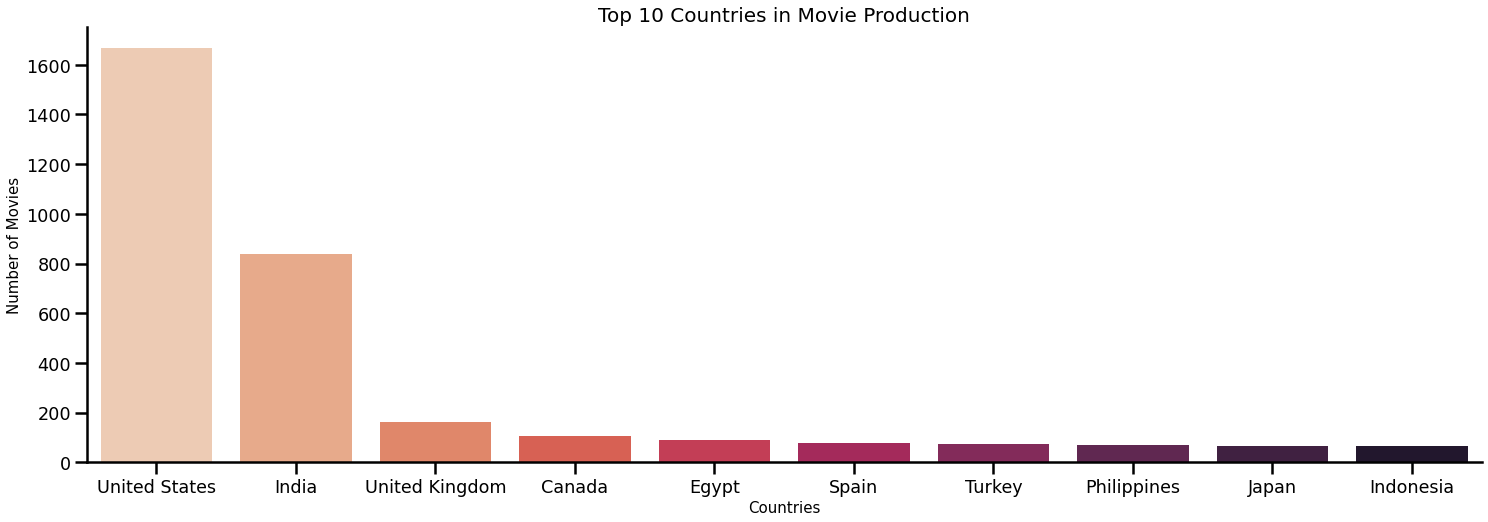

In [170]:
# Visualization 7 Top 10 Countries in Movie Production
movies_data = data[data['type'] == 'Movie']
top10countries_movies = movies_data.groupby(['country']).size().sort_values(ascending=False)[0:10]

plt.figure(figsize = (25,8))
g = sns.barplot(x=top10countries_movies.index, y=top10countries_movies, palette='rocket_r')

for i in ['top', 'right']:
    g.spines[i].set_visible(False)

g.set(yticklabels=[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
plt.title('Top 10 Countries in Movie Production', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)

Histogram diatas adalah visualisasi dari 10 negara terbanyak dalam produksi film pada platform netflix. Sumbu x berisi informasi tentang 10 negara terbanyak dalam produksi film dan sumbu y berisi informasi tentang jumlah produksi film. Dapat dilihat dari visualisasi diatas bahwa Amerika Serikat dan India mendominasi produksi film di netflix dan jumlah terbanyak dipegang oleh Amerika Serikat.

# Visualization 8 Top 10 Countries in TV Show Production

<ipython-input-169-d146608694c4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(yticklabels=[0, 100, 200, 300, 400, 500, 600])


Text(0, 0.5, 'Number of TV Show')

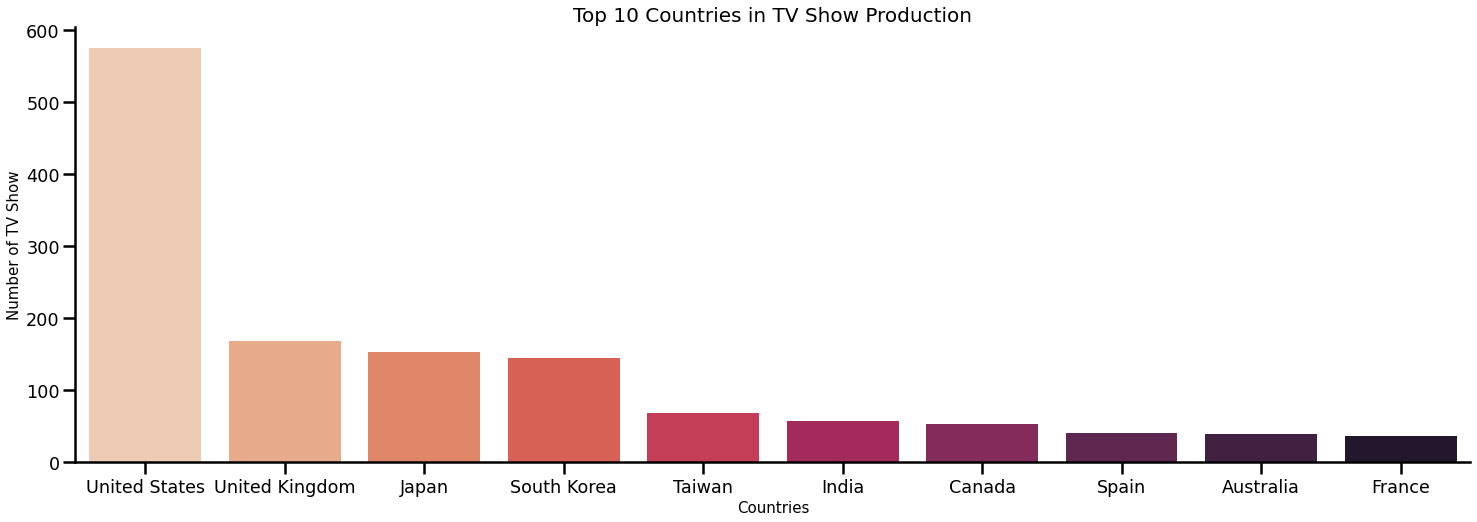

In [169]:
# Visualization 8 Top 10 Countries in TV Show Production
tvshows_data = data[data['type'] == 'TV Show']
top10countries_tvshows = tvshows_data.groupby(['country']).size().sort_values(ascending=False)[0:10]

plt.figure(figsize = (25,8))
g = sns.barplot(x=top10countries_tvshows.index, y=top10countries_tvshows, palette='rocket_r')

for i in ['top', 'right']:
    g.spines[i].set_visible(False)

g.set(yticklabels=[0, 100, 200, 300, 400, 500, 600])
plt.title('Top 10 Countries in TV Show Production', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Number of TV Show', fontsize = 15)

Histogram diatas adalah visualisasi dari 10 negara terbanyak dalam produksi tv show. Sumbu x berisi tentang informasi 10 negara terbanyak dalam produksi tv show dan sumbu y berisi informasi tentang jumlah produksi tv show. Dapat dilihat dari visualisasi diatas bahwa Amerika Serikat mendominasi produksi tv show terbanyak.

# Visualization 9 Netflix Genres Wordcloud

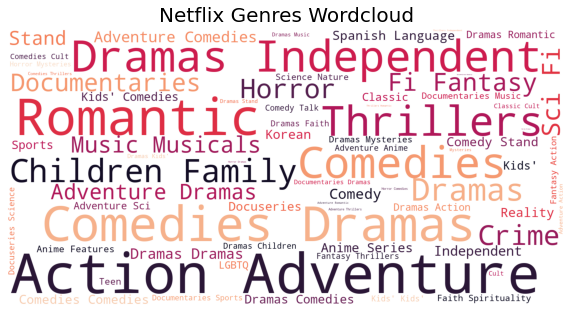

In [173]:
# Visualization 9 Netflix Genres Wordcloud
data['genre'] = data['listed_in'].apply(lambda x: x.replace(' TV','').replace('TV ','').replace(' ,',',').replace(', ',',').split(','))

stopwords = set(STOPWORDS)
stopwords.update(['Shows','Movies','British','International'])

all_summary = ' '.join(' '.join(s) for s in data['genre'])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      colormap='rocket',
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,6))

plt.title('Netflix Genres Wordcloud', fontsize = 20)

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Visualisasi diatas adalah kumpulan wordcloud dari seluruh genre yang ada di platform netflix

# Visualization 10 Most Common Countries in Netflix Platform

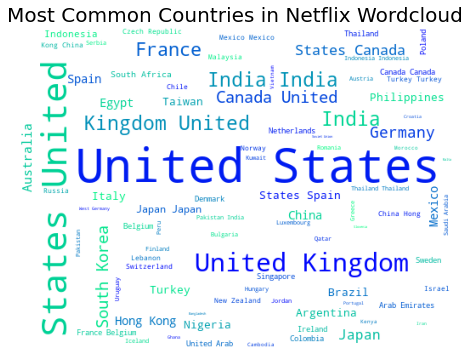

In [8]:
# Visualization 10 Most Common Countries in Netflix Platform
country = data.country
plt.subplots(figsize =(10,6))
wordcloud = WordCloud(
                            background_color = 'white',
                            colormap = 'winter',
                            width = 512,
                            height = 384
                        ).generate(" ".join(country))

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Common Countries in Netflix Wordcloud', fontsize = 20)

plt.show()